In [1]:
import numpy as np

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevPQC
from squlearn.observables import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam

import pennylane as qml

In [2]:
executor = Executor(qml.device("default.qubit"))
nqubits = 8
number_of_layers = 3
pqc = ChebyshevPQC(nqubits, 1, num_layers=number_of_layers)
obs = SummedPaulis(nqubits)
reg = QNNRegressor(pqc, obs, executor, SquaredLoss(), Adam(), parameter_seed=0,variance=0.005)
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)
reg.fit(x_space, ref_values)
reg.param

fit: 100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


array([ 0.88873305,  0.77865853,  1.34712653,  0.5831306 , -1.14827617,
        1.32041298,  0.08742232,  2.78603336,  0.61661264,  1.07835965,
        0.66891598,  1.2654463 ,  1.50549756,  3.56606132,  4.0291226 ,
        4.62088664, -5.08788939,  4.73743401,  3.37914821,  4.13898573,
        6.60389852,  4.19790736, -0.95128474,  4.08911677, -0.6349896 ,
        0.02665226,  1.56535567,  2.14246514,  1.94356543,  2.24678173,
        2.93652602,  3.28148319,  0.20747159,  1.43656604, -5.38966262,
        0.39365053,  1.88480831,  1.91818856,  6.60012384,  1.96294514,
        0.4824759 ,  1.12684549,  1.48169547,  2.27276244,  2.86582262,
        3.49913954,  2.84177016,  3.3407398 , -1.55254269, -1.0999599 ,
        0.34820626, -1.42858371,  7.04817588, -4.51802065, -3.09325673,
       -3.69323075,  1.5695801 , -2.1480814 , -0.91511116, -1.10388484,
       -1.59427556, -2.05710183,  0.42424534, -2.87650578])

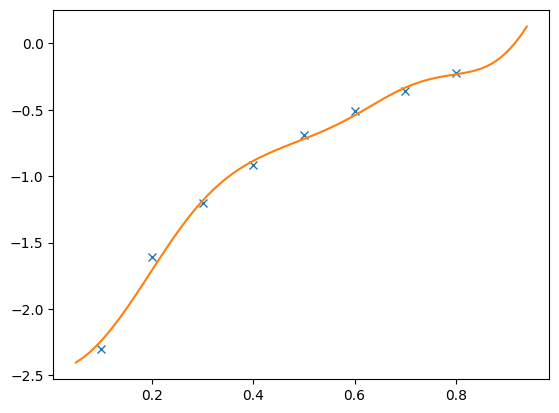

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_space, ref_values,'x')
x_grid = np.arange(0.05, 0.95, 0.01)
y_pred = reg.predict(x_grid)
plt.plot(x_grid, y_pred, '-')